<a href="https://colab.research.google.com/github/SheldonFrank/copilot-codespaces-vscode/blob/main/notebooks/starter_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.model_selection import train_test_split

housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

housing["id"]

,id
0,1565930130
1,3279000420
2,194000575
3,2115510160
4,7522500005
...,...
19995,5272200045
19996,9578500790
19997,7202350480
19998,1723049033


In [9]:
housing["major"] = housing["id"].map(lambda x: str(x)[0:6])
housing["minor"] = housing["id"].map(lambda x: str(x)[6:])

housing["major"].value_counts()

,count
major,
276760,62
510140,56
343850,49
154580,48
277060,46
...,...
787960,1
549920,1
686170,1


This code will create a file named `housing_ids.csv` in your current working directory, containing only the `id` column from the `housing` DataFrame. The `index=False` argument prevents pandas from writing the DataFrame index as a column in the CSV file.

In [8]:
housing.head(10)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,major,minor
0,1565930130,20141104T000000,4,3.25,3760,4675,2.0,0,0,3,...,2007,0,98038,47.3862,-122.048,3280,4033,429900.0,156593,0130
1,3279000420,20150115T000000,3,1.75,1460,7800,1.0,0,0,2,...,1979,0,98023,47.3035,-122.382,1310,7865,233000.0,327900,0420
2,194000575,20141014T000000,4,1.00,1340,5800,1.5,0,2,3,...,1914,0,98116,47.5658,-122.389,1900,5800,455000.0,194000,575
3,2115510160,20141208T000000,3,1.75,1440,8050,1.0,0,0,3,...,1985,0,98023,47.3187,-122.390,1790,7488,258950.0,211551,0160
4,7522500005,20140815T000000,2,1.50,1780,4750,1.0,0,0,4,...,1947,0,98117,47.6859,-122.395,1690,5962,555000.0,752250,0005
5,3787000140,20140901T000000,3,2.25,1780,9969,1.0,0,0,3,...,1985,0,98034,47.7286,-122.168,1950,7974,450000.0,378700,0140
6,7852110690,20140522T000000,4,2.50,2980,8107,2.0,0,0,3,...,2000,0,98065,47.5389,-121.876,2750,7760,622500.0,785211,0690
7,5469700260,20140903T000000,4,2.25,2530,24700,2.0,0,0,3,...,1974,0,98031,47.3939,-122.177,2650,24700,340000.0,546970,0260
8,8691410730,20150220T000000,4,2.50,3090,5600,2.0,0,0,3,...,2005,0,98075,47.5970,-121.979,3080,5788,708000.0,869141,0730
9,114100763,20140728T000000,3,0.75,1040,15000,1.0,0,0,3,...,1941,0,98028,47.7639,-122.234,1410,19000,230000.0,114100,763


<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:8: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-2177373654.py:8: SyntaxWarning: invalid escape sequence '\.'
  mortgage_rates['Date'] = mortgage_rates['Date'].astype(str).str.replace('\.0$', '', regex=True)


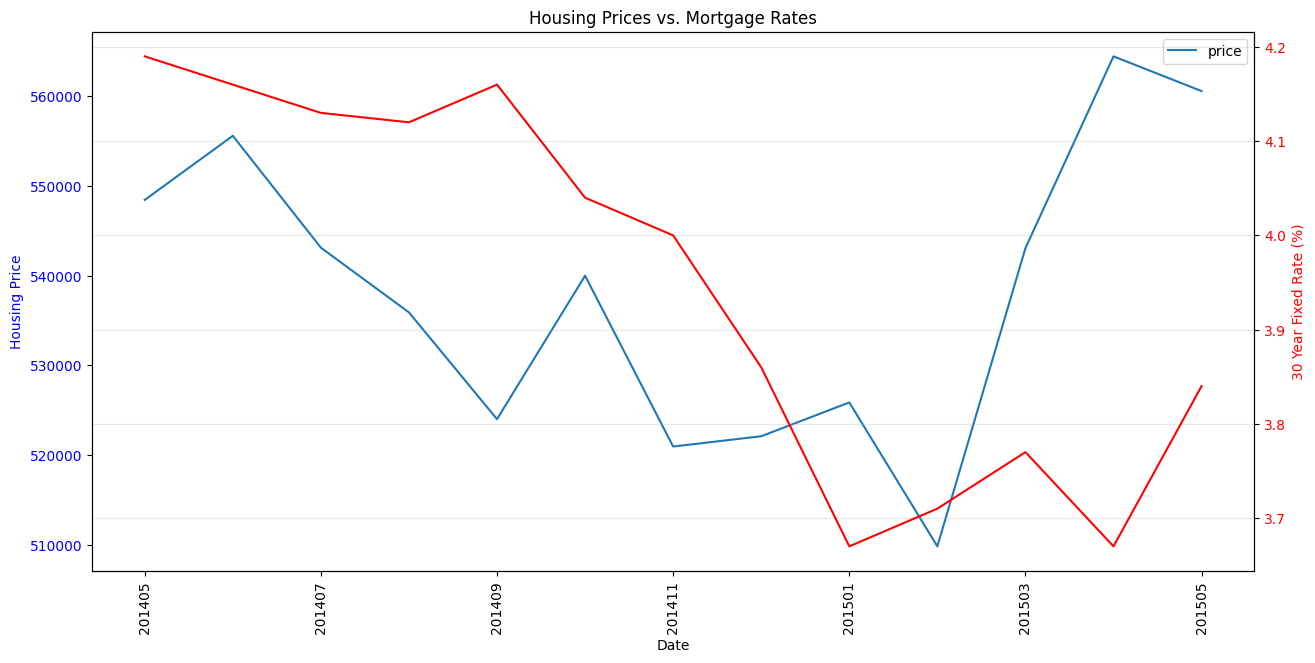

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

mortgage_rates = pd.read_csv("mortgage_rates.csv")
housing['month'] = housing['date'].map(lambda x: x[0:6])

# Convert 'Date' column in mortgage_rates to string 'YYYYMM' format
mortgage_rates['Date'] = mortgage_rates['Date'].astype(str).str.replace('\.0$', '', regex=True)

filtered_rates = mortgage_rates[mortgage_rates['Date'].isin(housing['month'])]

mean_price_by_date = housing.groupby('month')['price'].mean().reset_index()
mean_price_by_date.head()

fig, ax1 = plt.subplots(figsize=(15, 7))
mean_price_by_date.plot(x='month', y='price', rot=90, ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Housing Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 3. Create a twin axis that shares the same x-axis
ax2 = ax1.twinx()
# Plot Mortgage Rates on the right y-axis (ax2)
ax2.plot(filtered_rates['Date'], filtered_rates['30 Year FRM'], color='red', label='30 Year FRM')
ax2.set_ylabel('30 Year Fixed Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 4. Final touches
plt.title('Housing Prices vs. Mortgage Rates')
plt.grid(True, alpha=0.3)
plt.show()

In [68]:
housing_merged = pd.merge(
    housing,
    filtered_rates[['Date', '30 Year FRM', '15 Year FRM']], # Select only needed columns
    left_on='month',
    right_on='Date',
    how='left' # Keep all housing rows, fill with NaN if no rate found
)

housing_final = housing_merged
housing_final["Date"] = housing_final["Date"].map(lambda x: int(x))

housing_final.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,month,Date,30 Year FRM,15 Year FRM
0,1565930130,20141104T000000,4,3.25,3760,4675,2.0,0,0,3,8,2740,1020,2007,0,98038,47.3862,-122.048,3280,4033,429900.0,201411,201411,4.00,3.19
1,3279000420,20150115T000000,3,1.75,1460,7800,1.0,0,0,2,7,1040,420,1979,0,98023,47.3035,-122.382,1310,7865,233000.0,201501,201501,3.67,2.99
2,194000575,20141014T000000,4,1.00,1340,5800,1.5,0,2,3,7,1340,0,1914,0,98116,47.5658,-122.389,1900,5800,455000.0,201410,201410,4.04,3.21
3,2115510160,20141208T000000,3,1.75,1440,8050,1.0,0,0,3,8,1440,0,1985,0,98023,47.3187,-122.390,1790,7488,258950.0,201412,201412,3.86,3.13
4,7522500005,20140815T000000,2,1.50,1780,4750,1.0,0,0,4,7,1080,700,1947,0,98117,47.6859,-122.395,1690,5962,555000.0,201408,201408,4.12,3.25


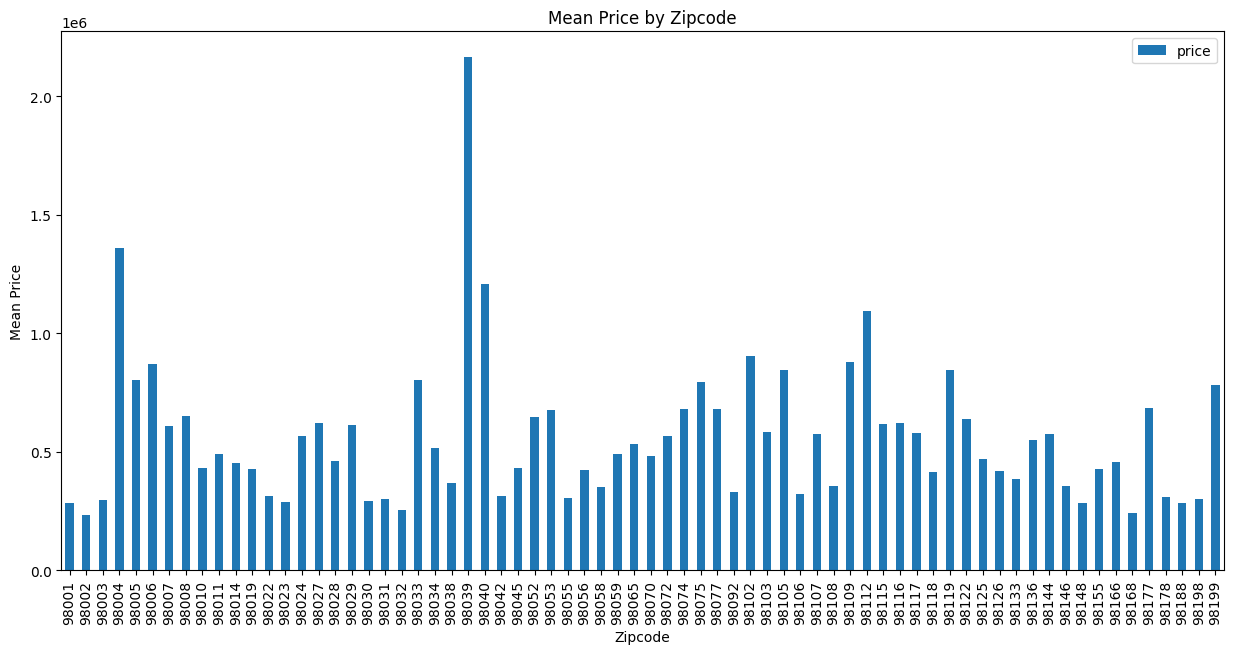

In [69]:
mean_price_by_zipcode = housing.groupby('zipcode')['price'].mean().reset_index()
ax = mean_price_by_zipcode.plot.bar(x='zipcode', y='price', rot=90, figsize=(15, 7))
plt.title('Mean Price by Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Mean Price')
plt.show()

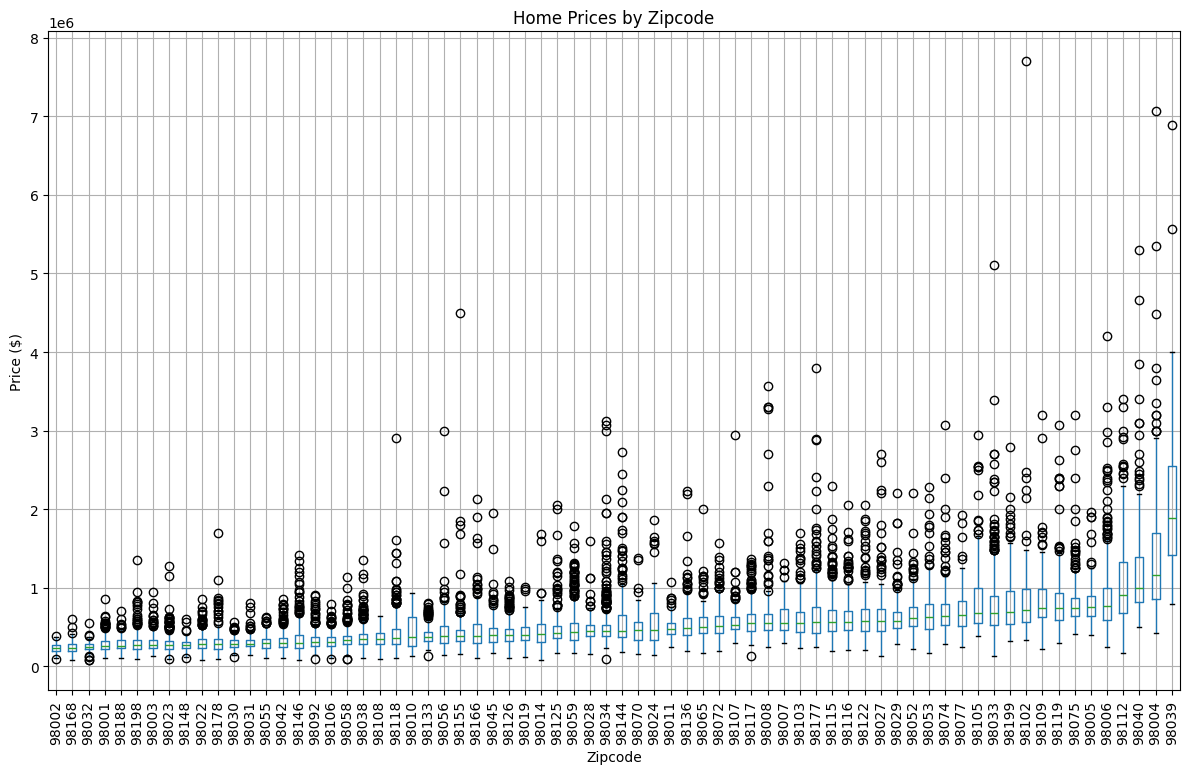

In [70]:
zipcodes = housing['zipcode'].value_counts()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

import matplotlib.pyplot as plt
import pandas as pd

# 1. Filter the data
plot_data = housing[housing['zipcode'].isin(zipcodes.index)].copy()

# 2. Calculate stats
stats = plot_data.groupby('zipcode')['price'].agg(['median', 'count'])
stats = stats.sort_values('median') # Sort by price
order = stats.index

# 3. Create vertical-friendly labels: "Zipcode \n (n=Count)"
# Using \n puts the count on a new line, making the label narrower
new_labels = [f"{z}\n(n={c})" for z, c in zip(order, stats['count'])]

# 4. Enforce order
plot_data['zipcode'] = pd.Categorical(
    plot_data['zipcode'],
    categories=order,
    ordered=True
)

fig, ax = plt.subplots(figsize=(12, 8))

plot_data.boxplot(column='price', by='zipcode', rot=90, vert=True, ax=ax)

ax.set_xlabel('Zipcode')
ax.set_ylabel('Price ($)')
plt.title('Home Prices by Zipcode')
plt.suptitle('')
plt.tight_layout()
plt.show()


In [71]:
housing.loc[housing['price'] > 3000000]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,month
366,8907500070,20150413T000000,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750,5350000.0,201504
379,4389201095,20150511T000000,5,3.75,5020,8694,2.0,0,1,3,12,3970,1050,2007,0,98004,47.6146,-122.213,4190,11275,3650000.0,201505
619,2470100110,20140804T000000,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345,5570000.0,201408
1120,3025059093,20140729T000000,5,5.25,5090,23669,2.0,0,0,3,12,5090,0,2006,0,98004,47.6297,-122.216,3830,22605,3100000.0,201407
1582,6447300265,20141014T000000,4,5.50,7080,16573,2.0,0,0,3,12,5760,1320,2008,0,98039,47.6151,-122.224,3140,15996,4000000.0,201410
2106,7524900003,20141210T000000,2,1.75,6840,10000,2.5,1,4,3,11,4350,2490,2001,0,98008,47.6042,-122.112,3120,12300,3278000.0,201412
2144,1346300150,20141020T000000,8,4.00,7710,11750,3.5,0,0,5,12,6090,1620,1904,0,98112,47.6263,-122.314,4210,8325,3300000.0,201410
2174,8964800890,20150109T000000,3,3.25,4560,13363,1.0,0,4,3,11,2760,1800,1995,0,98004,47.6205,-122.214,4060,13362,3200000.0,201501
2290,8106100105,20141114T000000,4,4.25,5770,21300,2.0,1,4,4,11,5770,0,1980,0,98040,47.5850,-122.222,4620,22748,3850000.0,201411
2564,7738500731,20140815T000000,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408,4500000.0,201408


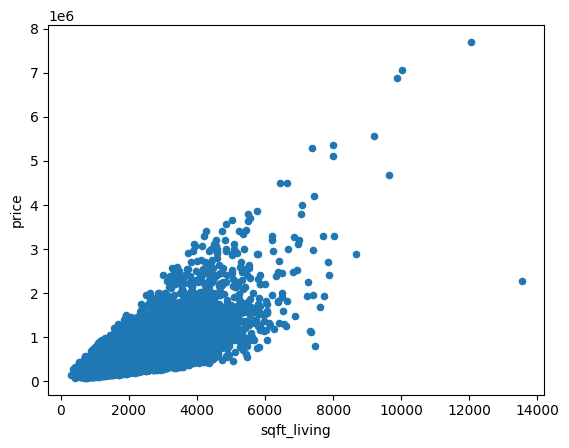

In [72]:
ax = housing.plot.scatter(x='sqft_living', y='price')
plt.show()

In [73]:
income_df = pd.read_csv('king_county_income.csv')

# 2. Ensure data types match (Crucial!)
# Zip codes can be read as numbers or strings. We convert both to strings
# to ensure they match perfectly during the merge.
housing_final['zipcode'] = housing_final['zipcode'].astype(str)

# 2. Force the 'Zipcode' column in your new INCOME data to string
income_df['Zipcode'] = income_df['Zipcode'].astype(str)

# 3. Merge the datasets
# We use 'left' merge to keep all rows in your original housing data,
# even if a zipcode is missing from the income list.
housing_final = pd.merge(
    housing_final,
    income_df,
    left_on='zipcode',   # The column name in your housing data
    right_on='Zipcode',  # The column name in your new csv
    how='left'
)

# 4. (Optional) Cleanup
# The merge might leave you with two zipcode columns (zipcode and Zipcode).
# You can drop the redundant one and rename the income column.
housing_final = housing_final.drop(columns=['Zipcode'])
housing_final = housing_final.rename(columns={'Median Household Income': 'median_income'})

housing_final.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,month,Date,30 Year FRM,15 Year FRM,median_income
0,1565930130,20141104T000000,4,3.25,3760,4675,2.0,0,0,3,8,2740,1020,2007,0,98038,47.3862,-122.048,3280,4033,429900.0,201411,201411,4.00,3.19,124164
1,3279000420,20150115T000000,3,1.75,1460,7800,1.0,0,0,2,7,1040,420,1979,0,98023,47.3035,-122.382,1310,7865,233000.0,201501,201501,3.67,2.99,87820
2,194000575,20141014T000000,4,1.00,1340,5800,1.5,0,2,3,7,1340,0,1914,0,98116,47.5658,-122.389,1900,5800,455000.0,201410,201410,4.04,3.21,124795
3,2115510160,20141208T000000,3,1.75,1440,8050,1.0,0,0,3,8,1440,0,1985,0,98023,47.3187,-122.390,1790,7488,258950.0,201412,201412,3.86,3.13,87820
4,7522500005,20140815T000000,2,1.50,1780,4750,1.0,0,0,4,7,1080,700,1947,0,98117,47.6859,-122.395,1690,5962,555000.0,201408,201408,4.12,3.25,146887


In [119]:
features_to_drop = ["price", 'id', 'date', 'yr_renovated', 'month']
#housing_final["month"] = housing["month"].map(lambda x: int(x))
X = housing_final.drop(columns=features_to_drop)
y = housing_final['price']

X = pd.get_dummies(X, columns=['zipcode'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
#model = XGBRFRegressor(max_depth=5, n_estimators=1000, n_jobs=-1)
model = XGBRegressor(learning_rate=0.1,
                     n_estimators=1000,
                     n_jobs=-1,
                     max_depth=3,
                     subsample=0.5)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=-1, num_parallel_tree=None, ...)

In [102]:
importances = model.feature_importances_
importances

array([0.00405384, 0.02637275, 0.1021378 , 0.00755873, 0.0056593 ,
       0.05908179, 0.03592844, 0.00765989, 0.18326604, 0.0074059 ,
       0.00584934, 0.01746575, 0.05547397, 0.02652187, 0.00936821,
       0.00715031, 0.00784429, 0.        , 0.00527923, 0.00474034,
       0.02509489, 0.        , 0.00112989, 0.06097331, 0.00362739,
       0.00700423, 0.00233063, 0.00417741, 0.00279758, 0.00250203,
       0.00580506, 0.00137135, 0.        , 0.00348386, 0.00372631,
       0.00310863, 0.00452642, 0.00155183, 0.        , 0.        ,
       0.        , 0.00548489, 0.0081852 , 0.00227243, 0.05888439,
       0.0114907 , 0.00376898, 0.00206269, 0.00282787, 0.00337354,
       0.00157426, 0.00144982, 0.        , 0.00379821, 0.00955805,
       0.00098315, 0.0025794 , 0.00659649, 0.        , 0.00235836,
       0.00268256, 0.01936398, 0.00614729, 0.01497379, 0.00241269,
       0.00316029, 0.00613828, 0.00987532, 0.02567531, 0.00302969,
       0.00252894, 0.00148961, 0.00333249, 0.01188868, 0.00545

In [121]:
predictions = model.predict(X_test)

In [122]:
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

#r_squared metric
r2 = r2_score(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)
print(rmse)
print(r2)

125940.54614568393
0.8948336225098301
